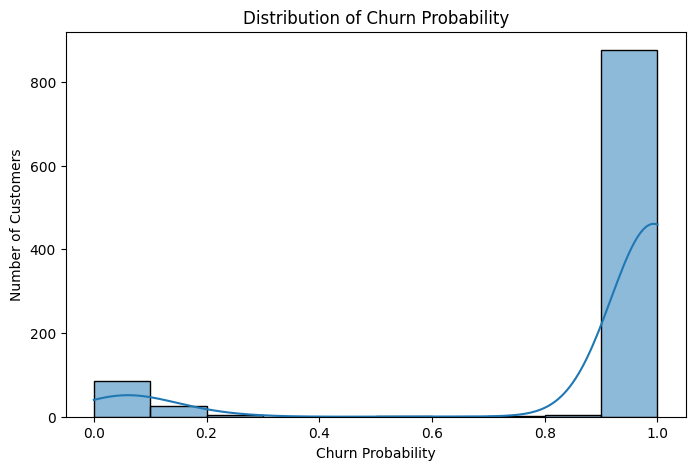

C:\Users\ayand\AppData\Local\Temp\ipykernel_9952\4070899467.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Risk_Segment', data=df, palette='Set2')


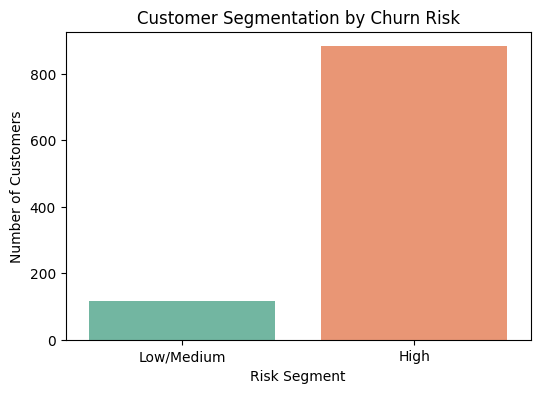

C:\Users\ayand\AppData\Local\Temp\ipykernel_9952\4070899467.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ContractType', data=df[df['Risk_Segment'] == 'High'], palette='Reds')


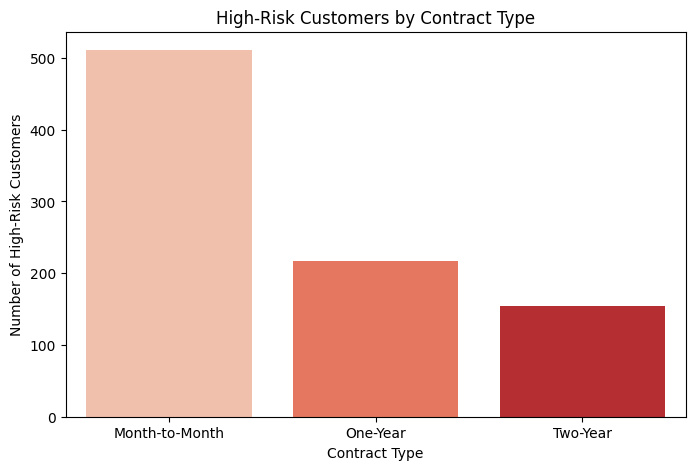

Retention Strategy: Offer discounts or loyalty benefits to high-risk customers to reduce churn.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load and preprocess data
df = pd.read_csv('customer (2).csv')
categorical_cols = df.select_dtypes(include='object').columns.drop('Churn')
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

X = df_encoded.drop(['Churn', 'CustomerID'], axis=1, errors='ignore')
y = df_encoded['Churn']

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict churn probabilities for all customers
df['Churn_Probability'] = rf.predict_proba(X)[:, 1]

# Segment customers: High risk if probability > 0.7
df['Risk_Segment'] = pd.cut(df['Churn_Probability'], bins=[0, 0.7, 1], labels=['Low/Medium', 'High'])

# Visualization: Distribution of Churn Probability
plt.figure(figsize=(8, 5))
sns.histplot(df['Churn_Probability'], bins=10, kde=True)
plt.title('Distribution of Churn Probability')
plt.xlabel('Churn Probability')
plt.ylabel('Number of Customers')
plt.show()

# Visualization: Risk Segment Count
plt.figure(figsize=(6, 4))
sns.countplot(x='Risk_Segment', data=df, palette='Set2')
plt.title('Customer Segmentation by Churn Risk')
plt.xlabel('Risk Segment')
plt.ylabel('Number of Customers')
plt.show()

# Visualization: High-risk customers by Contract Type
plt.figure(figsize=(8, 5))
sns.countplot(x='ContractType', data=df[df['Risk_Segment'] == 'High'], palette='Reds')
plt.title('High-Risk Customers by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of High-Risk Customers')
plt.show()

# Retention strategy suggestion (text output)
print("Retention Strategy: Offer discounts or loyalty benefits to high-risk customers to reduce churn.")